In [5]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import seaborn as sns

In [6]:
Total_waste = pd.read_csv("Total Waste.csv")
Total_waste = Total_waste.rename(columns={'TIME': 'Country'})

In [7]:
def clean_numeric_data(df):
    # Replace ":" with NaN
    df.replace(':', pd.NA, inplace=True)

    # Function to extract numeric values
    def extract_numeric(value):
        if isinstance(value, str):
            numeric_part = ''.join(c for c in value if c.isdigit() or c == '.')
            try:
                return pd.to_numeric(numeric_part)
            except ValueError:
                return pd.NA
        return value

    # Apply the function to numeric columns
    numeric_columns = df.columns[1:]  # Exclude the "Country" column
    df[numeric_columns] = df[numeric_columns].applymap(extract_numeric)

    # Fill NaN values with 0
    df.fillna(0, inplace=True)

clean_numeric_data(Total_waste)

In [8]:
df3 = pd.read_csv('Total Waste _ Non hazarduous.csv')
df4 = pd.read_csv("Total Waste _ hazarduous.csv")
clean_numeric_data(df4)
clean_numeric_data(df3)

In [9]:
sources = pd.read_csv("Waste sources - Feuille 1.csv")
clean_numeric_data(sources)

In [10]:
Waste_treatment = pd.read_csv("Waste Treatment - Total waste - op waste treatment.csv")
clean_numeric_data(Waste_treatment)
Waste_treatment= Waste_treatment.rename(columns={'TIME': 'Country'})


In [11]:
#Recovery
ER = pd.read_csv("Waste Treatment - Recovery - Energy Recovery.csv")
RB = pd.read_csv("Waste Treatment - Rcovery - Recycling and backfilling.csv")

#Disposal
LO = pd.read_csv("landfill.csv")
IN = pd.read_csv("Waste Treatment - Disposal - incineration.csv")

clean_numeric_data(ER)
clean_numeric_data(RB)
clean_numeric_data(LO)
clean_numeric_data(IN)

In [12]:
# Calculate the sum of total waste for all years
total_waste_sum = Total_waste.drop(columns='Country').sum().sum()

# Calculate the sum of treated waste for all years
treated_waste_sum = Waste_treatment.drop(columns='Country').sum().sum()

# Calculate the percentage of treated waste out of total waste
percentage_treated_waste = (treated_waste_sum / total_waste_sum) * 100

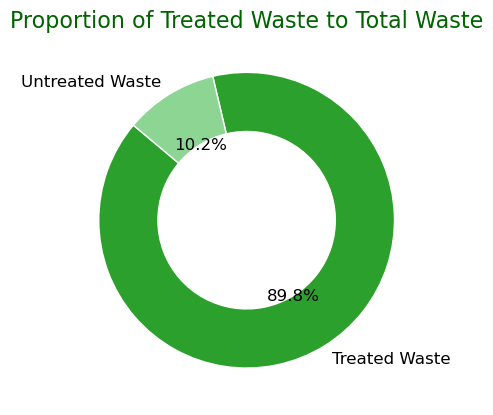

In [13]:
weights = [percentage_treated_waste, 100 - percentage_treated_waste]
labels = ['Treated Waste', 'Untreated Waste']

# Define colors for the pie chart
colors = ['#2ca02c', '#8dd593']  # Adjusted shades of green

# Plotting the pie chart with custom colors
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    weights,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1),
    colors=colors
)

# Adjusting text properties for better readability
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

# Adding a title
ax.set_title('Proportion of Treated Waste to Total Waste', fontsize=16, color='darkgreen')
plt.savefig("prop1.png", facecolor='#F9F9F9', bbox_inches='tight') 
# Display the pie chart
plt.show()


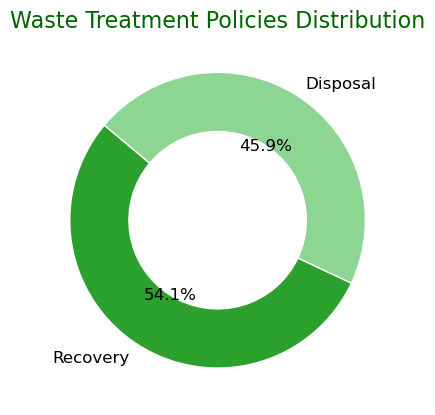

In [12]:
# Sum the values for each treatment
er_sum = ER.drop(columns='Country').sum().sum()
rb_sum = RB.drop(columns='Country').sum().sum()
lo_sum = LO.drop(columns='Country').sum().sum()
in_sum = IN.drop(columns='Country').sum().sum()

recovery_sum = er_sum + rb_sum
disposal_sum = lo_sum + in_sum
# Create a new DataFrame for the pie chart with an index
pie_data = pd.DataFrame({'Recovery': [recovery_sum], 'Disposal': [disposal_sum]}, index=['Total'])

# Define the weights and labels for your pie chart
weights = pie_data.iloc[0].values
labels = pie_data.columns

# Define colors for the pie chart
colors = ['#2ca02c', '#8dd593']  # Adjusted shades of green, similar to the first pie chart

# Plotting the pie chart with custom colors
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    weights,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1),
    colors=colors
)

# Adjusting text properties for better readability
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

# Adding a title
ax.set_title('Waste Treatment Policies Distribution', fontsize=16, color='darkgreen')
plt.savefig("prop2.png", facecolor='#F9F9F9', bbox_inches='tight')
# Display the pie chart
plt.show()


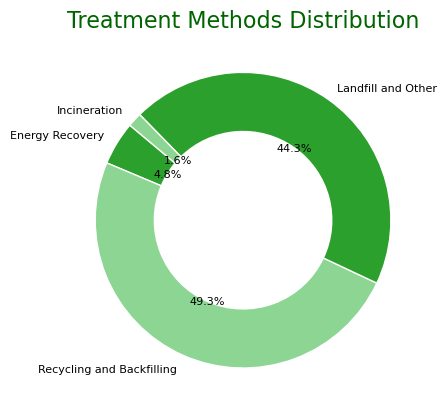

In [13]:
# Create a pie chart
labels = ['Energy Recovery', 'Recycling and Backfilling', 'Landfill and Other', 'Incineration']
sizes = [er_sum, rb_sum, lo_sum, in_sum]

# Define colors for the pie chart
colors = ['#2ca02c', '#8dd593', '#2ca02c', '#8dd593']  # Same shades of green as the previous pie charts

# Plotting the pie chart with custom colors
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w', linewidth=1),
    colors=colors
)

# Adjusting text properties for better readability
for text in texts + autotexts:
    text.set_fontsize(8)
    text.set_color('black')

# Adding a title
ax.set_title('Treatment Methods Distribution', fontsize=16, color='darkgreen')
plt.savefig("prop3.png", facecolor='#F9F9F9', bbox_inches='tight')
# Display the pie chart
plt.show()



In [14]:
regions = {
    'Eastern Europe': ['Albania', 'Belarus', 'Bulgaria', 'Czechia', 'Hungary', 'Moldova', 'Poland', 'Romania', 'Slovakia', 'Ukraine'],
    'Western Europe': ['Andorra', 'Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg', 'Monaco', 'Netherlands', 'Switzerland'],
    'Southern Europe': ['Croatia', 'Cyprus', 'Greece', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Slovenia', 'Spain'],
    'Northern Europe': ['Denmark', 'Estonia', 'Finland', 'Iceland', 'Ireland', 'Latvia', 'Lithuania', 'Norway', 'Sweden', 'United Kingdom'],
    'Balkans': ['Bosnia and Herzegovina', 'Kosovo', 'Montenegro', 'North Macedonia', 'Serbia'],
}

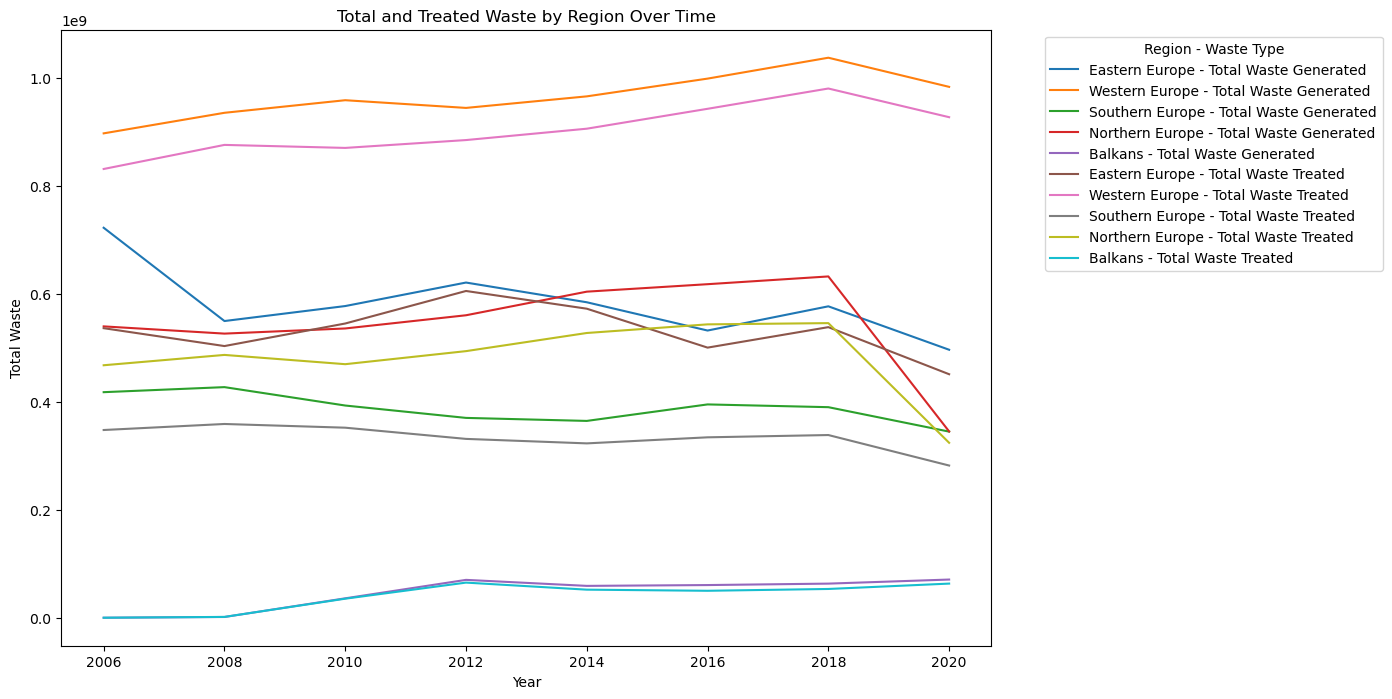

In [15]:
# Create a new dataframe to store the total waste for each region
region_total_waste = pd.DataFrame(index=Total_waste.columns[2:])

# Calculate the total waste for each region and add it to the new dataframe
for region, countries in regions.items():
    region_total_waste[region] = Total_waste[Total_waste['Country'].isin(countries)].iloc[:, 2:].sum(axis=0)

Waste_treatment= Waste_treatment.rename(columns={'TIME': 'Country'})

# Create a new dataframe to store the total waste for each region
region_treated_waste = pd.DataFrame(index=Waste_treatment.columns[2:])

# Calculate the total waste for each region and add it to the new dataframe
for region, countries in regions.items():
    region_treated_waste[region] = Waste_treatment[Waste_treatment['Country'].isin(countries)].iloc[:, 2:].sum(axis=0)


# Combine the two dataframes
combined_df = region_total_waste.copy()  
for region in regions.keys():
    combined_df[region + ' - Total Waste Treated'] = region_treated_waste[region]

# Customize legend labels for Total Waste
total_waste_legend_labels = [f"{region} - Total Waste Generated" for region in regions.keys()]

# Customize legend labels for Total Waste Treated
treated_waste_legend_labels = [f"{region} - Total Waste Treated" for region in regions.keys()]

# Plot the time series for each region and the total waste treated
ax = combined_df.plot(kind='line', figsize=(12, 8))
plt.title('Total and Treated Waste by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Total Waste')

ax.legend(total_waste_legend_labels + treated_waste_legend_labels, title='Region - Waste Type', 
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("line1.png",facecolor='#F9F9F9', bbox_inches='tight')
plt.show()



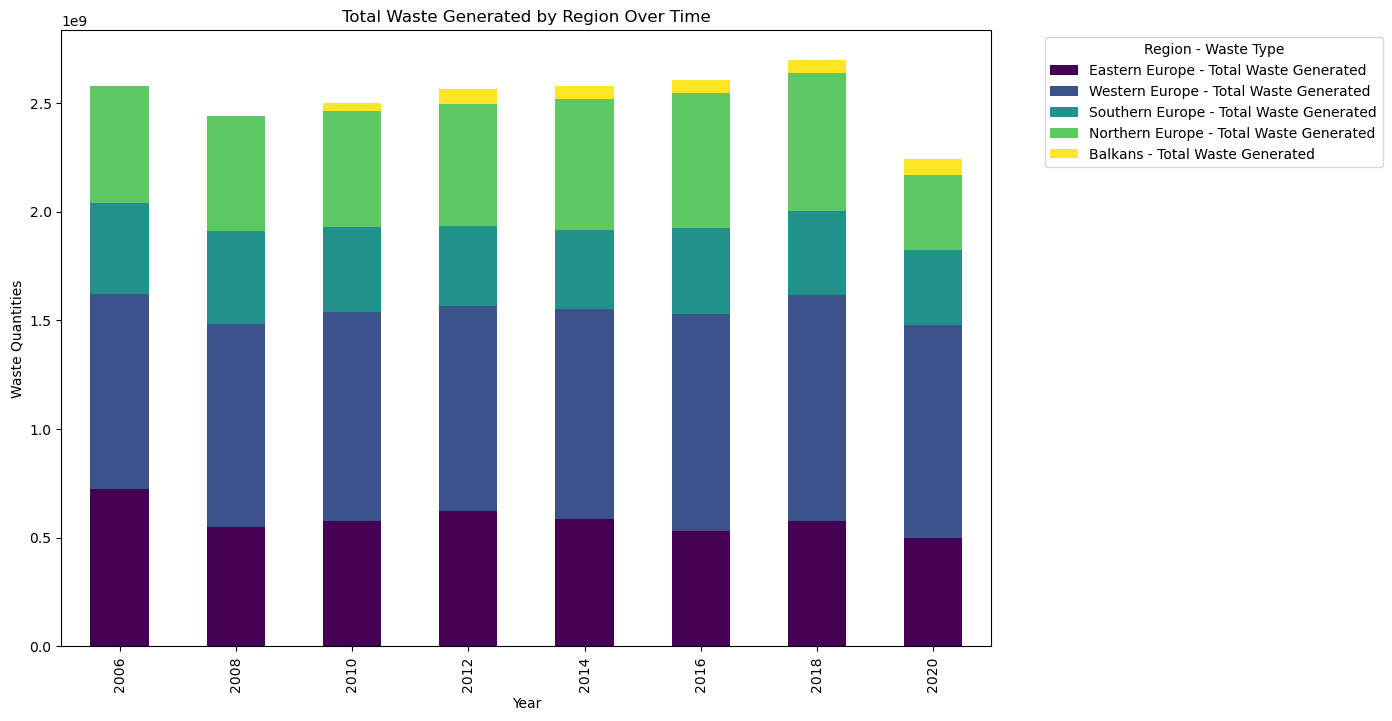

In [16]:
# Extract only the columns related to total waste generated (excluding total waste treated and Percentage Treated)
columns_to_plot = ['Eastern Europe', 'Western Europe', 'Southern Europe', 'Northern Europe', 'Balkans']

# Customize legend labels for Total Waste
total_waste_legend_labels = [f"{region} - Total Waste Generated" 
                             for region in columns_to_plot]

# Plot the bar chart for total waste with 'viridis' colormap
ax = combined_df[columns_to_plot].plot(kind='bar', stacked=True, 
                                       figsize=(12, 8), colormap='viridis')

plt.title('Total Waste Generated by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Waste Quantities')

# Move the legend to the side and set custom labels for the legend
ax.legend(total_waste_legend_labels, title='Region - Waste Type', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("stack1.png", facecolor='#F9F9F9', bbox_inches='tight')

plt.show()


In [17]:
recovery_df = ER + RB
recovery_df['Country'] = Total_waste['Country']
disposal_df = LO + IN
disposal_df['Country'] = Total_waste['Country']

In [18]:
# Calculate total values for each waste source
total_values = sources.iloc[:, 1:].sum()

# Sort waste sources based on total values
sorted_sources = total_values.sort_values(ascending=False)

# Select the top waste sources (excluding the 14 least values)
selected_sources = sorted_sources.iloc[:-20].index

# Filter the DataFrame to include only selected waste sources
filtered_sources = sources[['Country'] + list(selected_sources)]


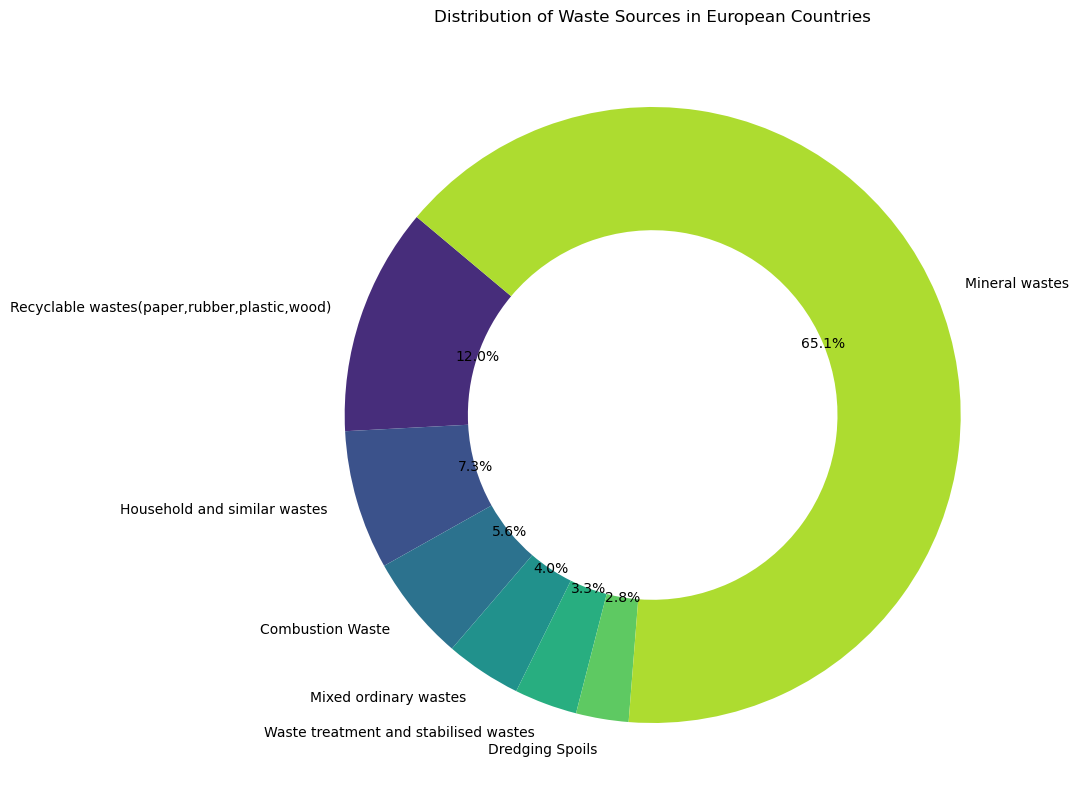

In [22]:
# Create a new DataFrame with regions as columns
regions_df = pd.DataFrame(columns=filtered_sources.columns)
for region, countries in regions.items():
    region_data = filtered_sources[filtered_sources['Country'].isin(countries)].copy()
    region_data['Country'] = region  # Set the region as the country name
    regions_df = pd.concat([regions_df, region_data])

# Combine "Minral Waste" and "Soils" into a single category
regions_df['Mineral wastes'] = regions_df['Minral Waste'] + regions_df['Soils']
regions_df.drop(['Minral Waste', 'Soils'], axis=1, inplace=True)

# Calculate total values for each waste source in each region
total_values_by_region = regions_df.groupby('Country').sum()

# Sum waste values across all regions
total_values_all_regions = total_values_by_region.sum()

# Custom color palette for more distinct colors
custom_palette = sns.color_palette("viridis", n_colors=len(total_values_all_regions))

# Plotting a pie chart for the distribution of sources across all European countries
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(total_values_all_regions, labels=total_values_all_regions.index, 
                                  autopct='%1.1f%%', colors=custom_palette, startangle=140, 
                                  wedgeprops=dict(width=0.4))
ax.set_title('Distribution of Waste Sources in European Countries')

for text, autotext in zip(texts, autotexts):
    text.set(size=10)
    autotext.set(size=10)
    
plt.savefig("prop6.png", facecolor='#F9F9F9', bbox_inches='tight')

plt.show()


In [23]:
# Sum the values for each year
disposal_total = disposal_df.iloc[:, 1:].sum(axis=1)
recovery_total = recovery_df.iloc[:, 1:].sum(axis=1)

In [24]:
# Create a new dataframe for visualization
quantity_df = pd.DataFrame({
    'Country': Total_waste['Country'],
    'Disposal - Total': disposal_total,
    'Recovery - Total': recovery_total
})

# Group countries into regions
for region, countries in regions.items():
    quantity_df.loc[quantity_df['Country'].isin(countries), 'Region'] = region

# Sum the values for each region
region_totals = quantity_df.groupby('Region').agg({'Disposal - Total': 'sum', 'Recovery - Total': 'sum'})

# Sort DataFrame by the total quantity
region_totals['Total Quantity'] = region_totals['Recovery - Total'] + region_totals['Disposal - Total']
region_totals = region_totals.sort_values(by='Total Quantity', ascending=True)

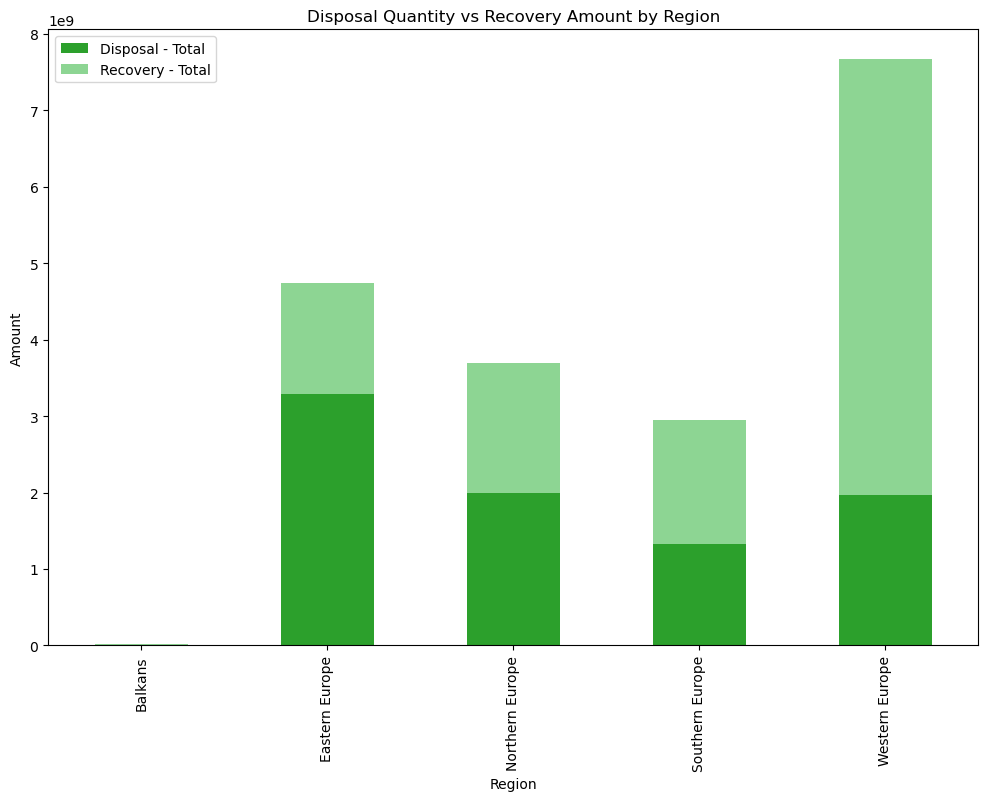

In [25]:
# Group the data by Region and sum the disposal and recovery amounts
grouped_df = quantity_df.groupby('Region').agg({'Disposal - Total': 'sum', 'Recovery - Total': 'sum'})

# Define custom color palette
custom_colors = ['#2ca02c', '#8dd593']
custom_cmap = ListedColormap(custom_colors)

# Plotting the bar chart with the custom color palette
fig, ax = plt.subplots(figsize=(12, 8))

grouped_df.plot(kind='bar', stacked=True, colormap=custom_cmap, ax=ax)
ax.set_title('Disposal Quantity vs Recovery Amount by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
plt.savefig("stack2.png", facecolor='#F9F9F9', bbox_inches='tight')

plt.show()


In [26]:
grouped_df

,Disposal - Total,Recovery - Total
Region,,
Balkans,1.271085e+07,1.177275e+07
Eastern Europe,3.291906e+09,1.455608e+09
Northern Europe,1.994762e+09,1.703518e+09
Southern Europe,1.330720e+09,1.614065e+09
Western Europe,1.974526e+09,5.701767e+09


In [27]:
# Sum the values for each year
Hazarduous_total = df4.iloc[:, 1:].sum(axis=1)
nHazarduous_total = df3.iloc[:, 1:].sum(axis=1)

# Create a new dataframe for visualization
quantity_df = pd.DataFrame({
    'Country': Total_waste['Country'],
    'Hazarduous - Total': Hazarduous_total,
    'Non Hazarduous - Total': nHazarduous_total
})

# Group countries into regions
for region, countries in regions.items():
    quantity_df.loc[quantity_df['Country'].isin(countries), 'Region'] = region

# Sum the values for each region
region_totals = quantity_df.groupby('Region').agg({'Hazarduous - Total': 'sum', 'Non Hazarduous - Total': 'sum'})

# Sort DataFrame by the total quantity
region_totals['Total Quantity'] = region_totals['Non Hazarduous - Total'] + region_totals['Hazarduous - Total']
region_totals = region_totals.sort_values(by='Total Quantity', ascending=True)

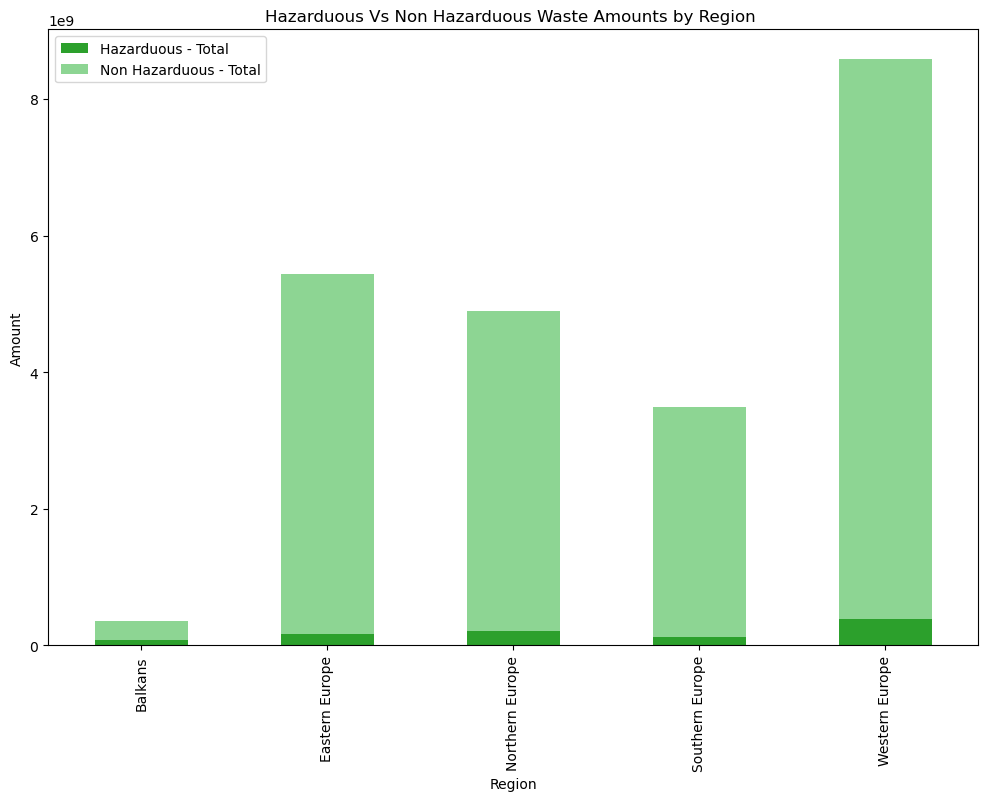

In [28]:
# Group the data by Region and sum the disposal and recovery amounts
grouped_df = quantity_df.groupby('Region').agg({'Hazarduous - Total': 'sum', 'Non Hazarduous - Total': 'sum'})

# Define custom color palette
custom_colors = ['#2ca02c', '#8dd593']
custom_cmap = ListedColormap(custom_colors)

# Plotting the bar chart with the custom color palette
fig, ax = plt.subplots(figsize=(12, 8))

grouped_df.plot(kind='bar', stacked=True, colormap=custom_cmap, ax=ax)
ax.set_title('Hazarduous Vs Non Hazarduous Waste Amounts by Region ')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')

# Adding data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
plt.savefig("stack4.png", facecolor='#F9F9F9', bbox_inches='tight')

plt.show()